# WeatherPy

### Observations and Trends:
- There is an inverse relationship between a city's latitude and temperature. As latitude increases, the temperature decreases.
- The plot for Humidity vs Latitude doesn't show any discernable correleation between latitude and humidity. However, we have to keep in mind the impact that topography and ocean currents have to humidity. Additional data is needed in order to make an accurate assessment. 
- Cities along the equatorial band (-20 to 40) show a pattern of having the greatest measure of cloudiness.  
- There seems to be no observable pattern when trying to correlate wind speed and latitude.


In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Determine city from latitude and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-90, 90)
lng_r=(-180, 180)

##### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=20)
lng = np.random.uniform(low=-180, high = 180, size=20)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

19

##### API Calls

In [3]:
# Set up api endpoints
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [4]:
# Loop iterating openweather api calls, adding retrieved data into the city_data dictionary.

city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.75)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving atuona, number 0 of 19.
Retrieving camacupa, number 1 of 19.
Retrieving asosa, number 2 of 19.
Retrieving busselton, number 3 of 19.
Retrieving katsiveli, number 4 of 19.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving rikitea, number 5 of 19.
Retrieving mutoko, number 6 of 19.
Retrieving tete, number 7 of 19.
Retrieving ahar, number 8 of 19.
Retrieving lata, number 9 of 19.
Retrieving mantua, number 10 of 19.
Retrieving pitsunda, number 11 of 19.
Retrieving cabo san lucas, number 12 of 19.
Retrieving mar del plata, number 13 of 19.
Retrieving wanaka, number 14 of 19.
Retrieving puerto del rosario, number 15 of 19.
Retrieving dongsheng, number 16 of 19.
Retrieving saldanha, number 17 of 19.
Retrieving bambous virieux, number 18 of 19.
Data retrieval completed.


In [5]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit = 's')
city_data_df.to_csv('Output/city_data.csv')

# city_data_df.dtypes  -- used to validate dtype; uncomment to test

city_data_df.head()

,City_Name,City_Lat,City_Long,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.30,77,29,23.64,PF,2021-06-16 00:53:08
1,Camacupa,-12.0167,17.4833,52.59,38,5,3.20,AO,2021-06-16 00:53:09
2,Āsosa,10.0667,34.5333,62.76,77,98,3.15,ET,2021-06-16 00:53:10
3,Busselton,-33.6500,115.3333,48.04,75,56,6.78,AU,2021-06-16 00:53:11
4,Rikitea,-23.1203,-134.9692,75.24,78,54,9.78,PF,2021-06-16 00:53:12


### Plotting City Data

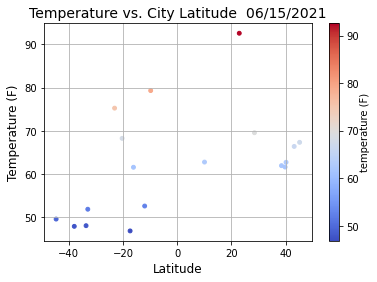

In [6]:
# Plot relationship of Temperature (F) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Temperature'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title(f'Temperature vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/temperature-vs-latitude.png')
plt.show()

#### Temperature vs City Latitude:
The code is analyzing the relationship between the city latitude and temperature. Data is taken from city_data_df, using 'o' as a marker to plot the City_Lat and Temperature as x,y coordinates. Matpltlib's built in colormap is used to map colors to numbers, where the lowest temperature is blue, and the highest temperature is red. 


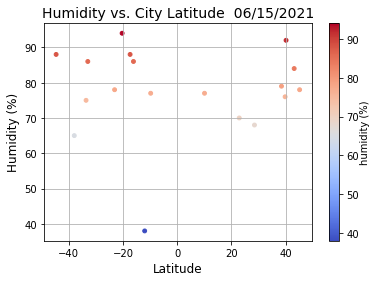

In [7]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Humidity'], 
           c =city_data_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("humidity (%)", labelpad=+1)
plt.grid(True) # add (True) for test

plt.savefig('Images/humidity-vs-latitude.png')
plt.show()

#### Humidity vs City Latitude:
The code is analyzing the relationship between the city latitude and humidity.

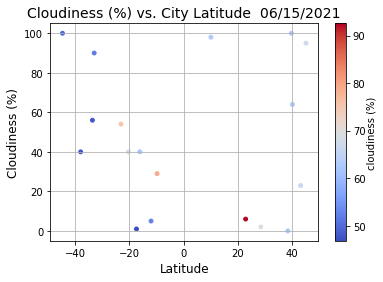

In [8]:
# Plot relationship of Cloudiness (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Cloudiness'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Cloudiness (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("cloudiness (%)", labelpad=+1)
plt.grid() # add (True) for test

plt.savefig('Images/cloudiness-vs-latitude.png')
plt.show()

#### Cloudiness vs City Latitude:
The code is analyzing the relationship between the city latitude and cloudiness. 

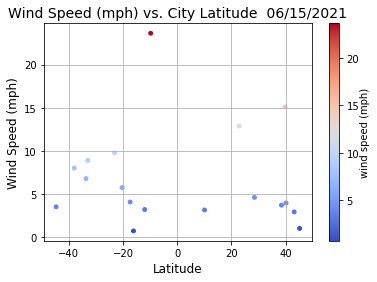

In [9]:
# Plot relationship of Wind Speed (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Wind_Speed'], 
           c =city_data_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Wind Speed (mph) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("wind speed (mph)", labelpad=+1)
plt.grid()

plt.savefig('Images/wind_speed-vs-latitude.png')
plt.show()

#### Wind Speed vs. Latitude
The code is analyzing the relationship between the city latitude and wind speed.

### Linear Regression


In [21]:
#Linear Regression plot function

def linear_regres(x, y, ax=None):
    ax=ax
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f'R Squared is: {rvalue**2}')
    
    # Print statement based on evaluation if rvalue condition is true/false.
    if rvalue <0:
        print('The regression displays a negative correlation')
    elif .0 < rvalue < .05:
        print('The regression displays a neutral correlation')
    else:
        print('The regression displays a positive correlation')
    
    regression_values = slope * x + intercept
    
    # Linear regression equation
    linear_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
                                                          
    # Plot linear regression
    ax.plot(x, regression_values, color='red')
    
    # End linear regression function and return results
    return ax, linear_eq

In [22]:
# Create dataframes and dict for N. Hemisphere (latitude >=0) and S. Hemisphere (latitude <0)
northern_df = city_data_df.loc[pd.to_numeric(city_data_df['City_Lat']).astype(float) >= 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df['City_Lat']).astype(float) < 0, :]

n_latitude = northern_df['City_Lat']
n_temperature = northern_df['Temperature']
n_humidity = northern_df['Humidity']
n_cloudiness = northern_df['Cloudiness']
n_windspeed = northern_df['Wind_Speed']

s_latitude = southern_df['City_Lat']
s_temperature = southern_df['Temperature']
s_humidity = southern_df['Humidity']
s_cloudiness = southern_df['Cloudiness']
s_windspeed = southern_df['Wind_Speed']
# print(n_latitude)  -- test if dict is valid

R Squared is: 0.09934799593202692
The regression displays a negative correlation


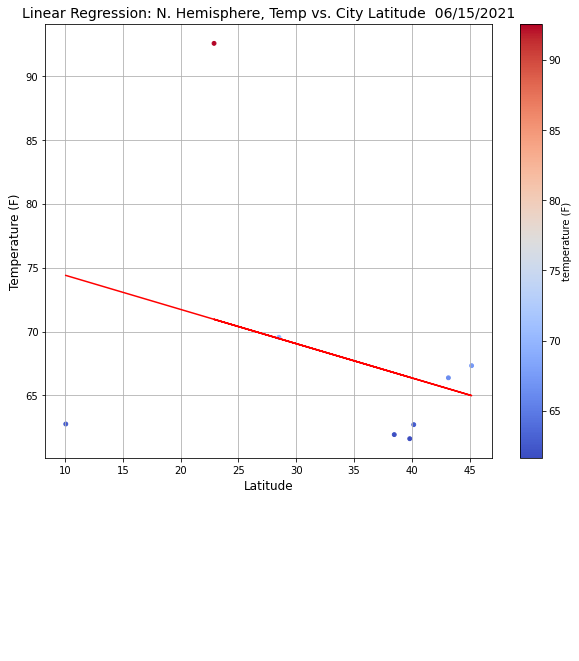

In [25]:
# Northern Hemisphere - Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(n_latitude, n_temperature, 
           c =northern_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(n_latitude, n_temperature, ax)

plt.title(f'Linear Regression: N. Hemisphere, Temp vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_temp-vs-lat.png')
plt.show()

R Squared is: 0.303482331115221
The regression displays a positive correlation


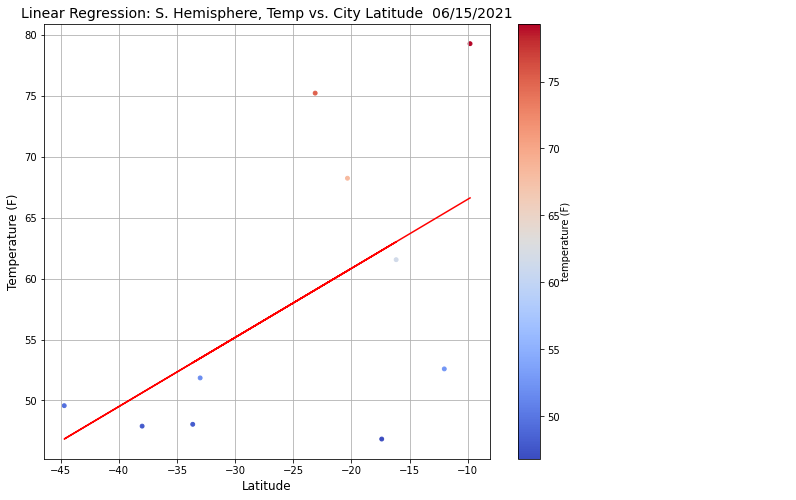

In [26]:
# Southern Hemisphere - Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(s_latitude, s_temperature, 
           c =southern_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(s_latitude, s_temperature, ax)

plt.title(f'Linear Regression: S. Hemisphere, Temp vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label('temperature (F)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_temp-vs-lat.png')
plt.show()

In [ ]:
# Northern Hemisphere - Humidity (%) vs. Latitude


In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude


In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude


In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude


In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude


In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
